# Time Series Analysis

## 1. What are time series data?

Time series data are everywhere! Any type of data that is recorded over time

- Hourly temperature data
- Stock price data which is recorded every minute
- The monthly sales of a certain company

Generally, the index for time series data is a time-stamp which could be going from a yearly index to a index up to the second.



## 2. Why time series analysis?

Often, basic regression techniques are not sufficient to grasp the more complex, time-dependent patterns that are common when dealing with time series data. Using time series analysis techniques, the purpose is to get more insight in your data on one hand, and to make predictions on the other hand. Some basic time series concepts that will be covered in the remainder of this lecture are:

- White Noise
- Random walk
- Autoregression
- Simple moving average

## 3. Trends

Before diving into the models, let's have a look at a very important time series concept: trends. We'll go through an overview of several types of trends that can be observed in time series models.

### 3.1 No trend

Let's look a the monthly returns for the NYSE from January 1961 through December 1966. You'll notice that the monthly return goes up and down, but there is no clear direction, and over time, the index oscillates around 0. We say that this particular time series has *no trend*. 

Monthly returns, NYSE, Jan 1961 to Dec 1966

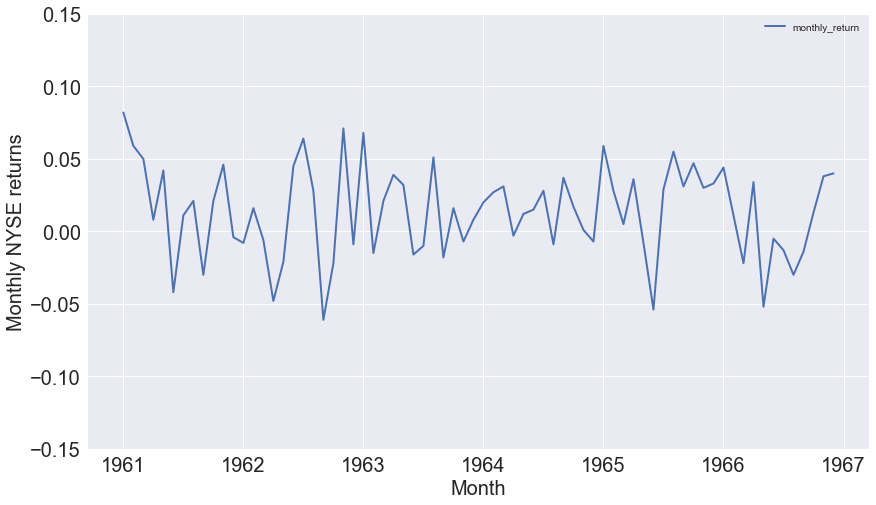

In [524]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

data = pd.read_csv("NYSE_monthly.csv")
col_name= 'Month'
data[col_name] = pd.to_datetime(data[col_name])
data.set_index(col_name, inplace=True)
data.plot(figsize=(14,8), linewidth=2, fontsize=20)
plt.xlabel(col_name, fontsize=20)
plt.ylabel("Monthly NYSE returns", fontsize=20)
plt.ylim((-0.15,0.15));

https://datamarket.com/data/set/22sx/monthly-returns-nyse-jan-1961-to-dec-1967#!ds=22sx&display=line


### 3.2 Linear trend

#### 3.2.1 Upward linear

In many cases, there will be some sort of trend, however. A common trend type is a linear trend, where the observation grows bigger over time, or declines. Examples given here are the quarterly U.K. importes of goods and services over time. A second example is a record of the winning times for the men's 400 m final at the olympics. This has gone down over thr years!

Quarterly U.K. imports: goods and services (in Million Pounds) 1963- 1970

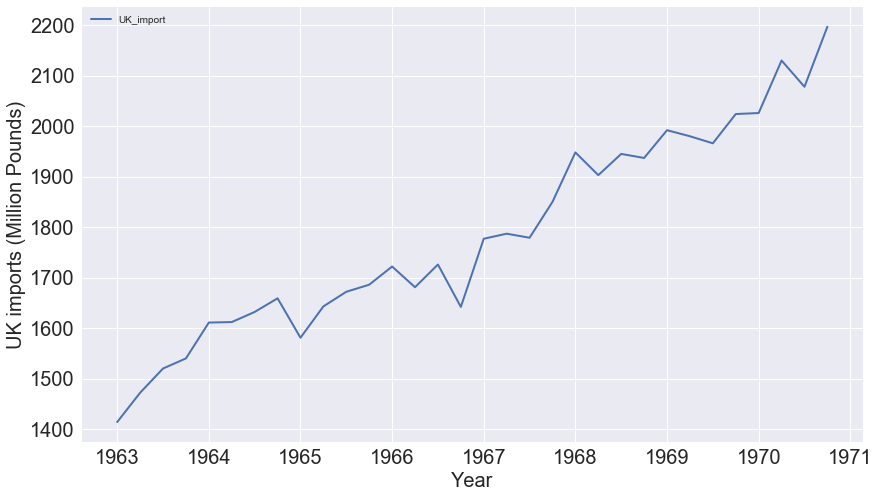

In [525]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

data = pd.read_csv("uk_imports.csv")
data.Quarter = pd.to_datetime(data.Quarter)
data.set_index('Quarter', inplace=True)
data.plot(figsize=(14,8), linewidth=2, fontsize=20)
plt.ylabel('UK imports (Million Pounds)', fontsize=20)
plt.xlabel('Year', fontsize=20);

https://datamarket.com/data/set/22sa/quarterly-uk-imports-goods-and-services-pound-millions-60-70#!ds=22sa&display=line

#### 3.2.1 Downward linear

Winning times for the men's 400 m final in each Olympic Games from 1896 to 1996 (NOTE: need to fix x-label)

In [519]:
data = pd.read_csv("winning_400m.csv")

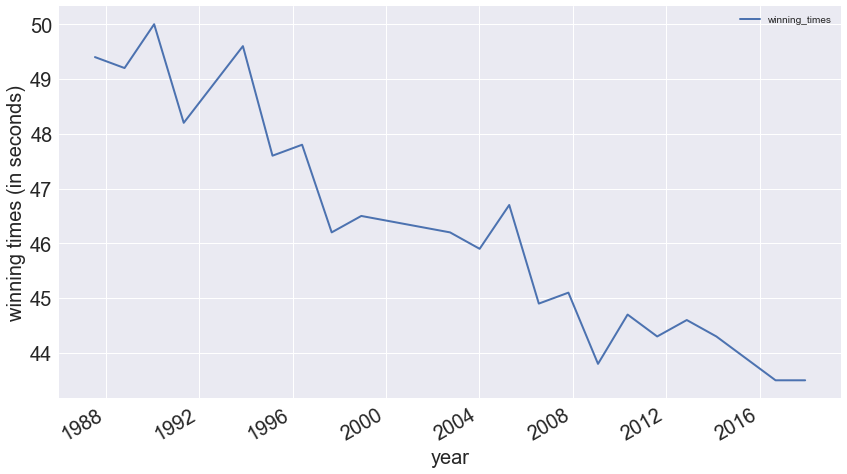

In [520]:
col_name= 'year'
data[col_name] = pd.to_datetime(data[col_name]*10000000000000000)
data.set_index(col_name, inplace=True)
data.plot(figsize=(14,8), linewidth=2, fontsize=20)
plt.xlabel(col_name, fontsize=20)
plt.ylabel("winning times (in seconds)", fontsize=20);

https://datamarket.com/data/set/22sa/quarterly-uk-imports-goods-and-services-pound-millions-60-70#!ds=22sa&display=line

### 3.3 exponential

Another type of trend that can be observed is an exponential trend. A typical example could be a company's sales. As small companies start to grow sales could be slower, when their product catches people's attention the sales can start to grow exponentially. A simulated example can be found below.

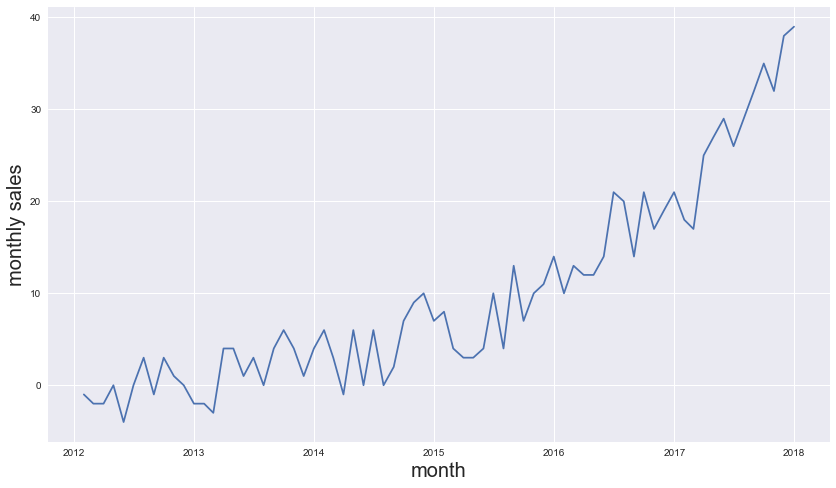

In [528]:
# generated data 
years = pd.date_range('2012-01', periods=72, freq="M")
index = pd.DatetimeIndex(years)

np.random.seed(3456)
sales= np.random.randint(-4, high=4, size=72)
bigger = np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,
                   3,3,3,3,3,3,3,3,7,7,7,7,7,7,7,7,7,7,7,
                   11,11,11,11,11,11,11,11,11,11,18,18,18,
                   18,18,18,18,18,18,26,26,26,26,26,36,36,36,36,36])
data = pd.Series(sales+bigger, index=index)

fig = plt.figure(figsize=(14,8))
plt.plot(data)
plt.xlabel("month", fontsize=20)
plt.ylabel("monthly sales", fontsize=20)
plt.show()

### 3.4 Periodic

Trends can obviously go up and down again as well. In many applications, what will happen is that trends are periodic. Think about temperature trends: while temperature will go up in summer, it will go down again in winter, and we can expect to see a cyclical pattern. The Australian minimum temperature data set shows the result below.

Daily minimum temperatures in Melbourne, Australia, 1981-1986

In [529]:
data = pd.read_csv("min_temp.csv")
data.Date = pd.to_datetime(data.Date)
data.set_index('Date', inplace=True)

In [530]:
data.head()

,Daily_min
Date,
1981-01-01,20.7
1981-02-01,17.9
1981-03-01,18.8
1981-04-01,14.6
1981-05-01,15.8


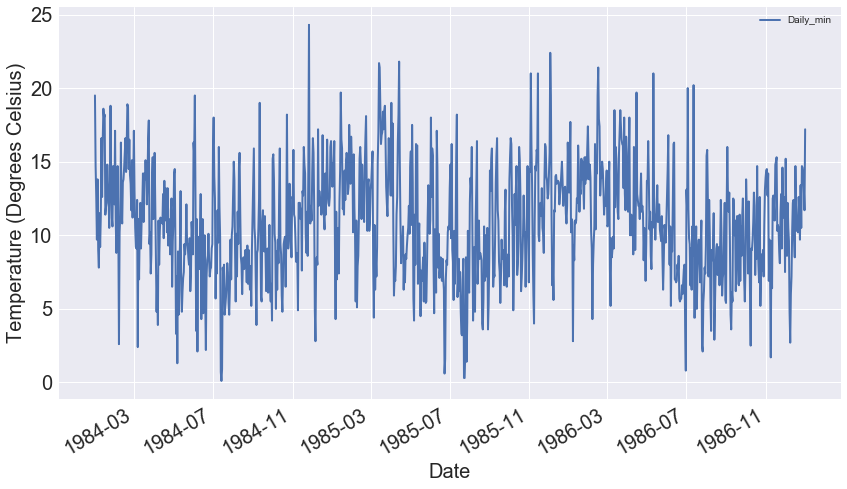

In [535]:
data_slice= data['1984':'1986']
data_slice.plot(figsize=(14,8), linewidth=2, fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Temperature (Degrees Celsius)', fontsize=20);

https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line

### 3.5 Increasing Variance

In the previous trend types, the variability remained constant over time. But in some cases, this might not be the case, and variability can change over time. A simulated example is shown in the plot below.

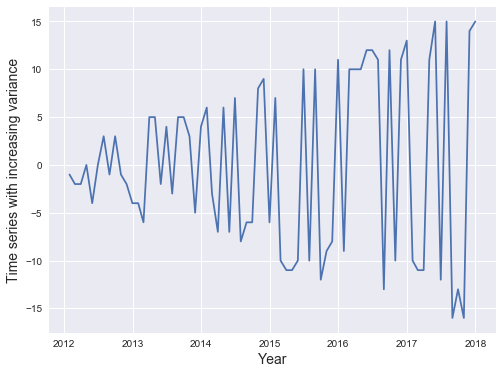

In [539]:
# generated data 
years = pd.date_range('2012-01', periods=72, freq="M")
index = pd.DatetimeIndex(years)

np.random.seed(3456)
sales= np.random.randint(-4, high=4, size=72)

add = np.where(sales>0, 1, -1)
bigger = np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,
                   3,3,3,3,4,4,5,5,6,6,6,6,6,7,7,7,7,7,7,8,8,8,8,8,8,8,
                   9,9,9,9,9,9,9,9,10,10,10,10,10,10,12,12,12,12,12,12,12,12])
data = pd.Series(sales+add*bigger, index=index)

fig = plt.figure(figsize=(8,6))
plt.plot(data)
plt.ylabel("Time series with increasing variance", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.show()

### 3.6 Periodic and upward trend

Obviously, several types of trends can also occur together in time series data. This plane passenger data shows that while there may be a periodic (seasonal) trend, there is also an upward trend over time.

Passenger Miles flown domestic in the U.K., from July ’62 to May ’72.

In [246]:
air = pd.read_csv("airpassengers.csv")
air.Month = pd.to_datetime(air.Month)
air.set_index('Month', inplace=True)
air.head()

,pass_miles_dom
Month,
1962-07-01,101.6
1962-08-01,101.5
1962-09-01,84.3
1962-10-01,51.0
1962-11-01,38.5


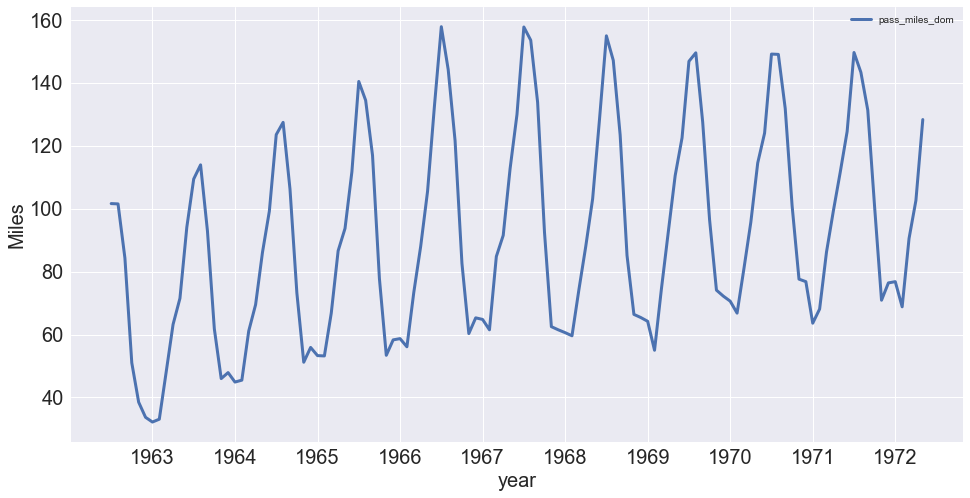

In [537]:
air.plot(figsize=(16,8), linewidth=3, fontsize=20)
plt.xlabel('year', fontsize=20)
plt.ylabel('Miles', fontsize=20);

https://datamarket.com/data/set/22mb/passenger-miles-mil-flown-domestic-uk-jul-62-may-72#!ds=22mb&display=line

# WIP stuff

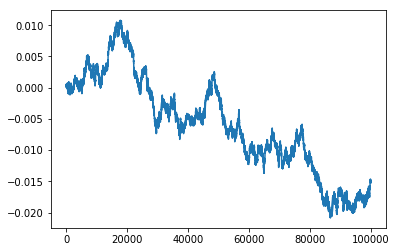

In [88]:
import numpy as np
import pandas as pd
from numpy import sqrt
import matplotlib.pyplot as plt

vol = .030
lag = 300
df = pd.DataFrame(np.random.randn(100000) * np.square(vol) * sqrt(1 / 252.)).cumsum()
plt.plot(df[0].tolist())
plt.show()

https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line

https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial

https://machinelearningmastery.com/load-explore-time-series-data-python/

https://machinelearningmastery.com/time-series-datasets-for-machine-learning/

## *DATA not used*

*stationary*:

https://datamarket.com/data/set/22ov/scholes-index-for-nyse-april-1963-to-july-1971#!ds=22ov&display=line 


https://datamarket.com/data/set/22mn/monthly-changes-in-canadian-wages-and-salaries-67-75#!ds=22mn&display=line 

*linear*:
upward linear https://datamarket.com/data/set/22m5/annual-real-per-capita-gnp-us-1909-to-1970#!ds=22m5&display=line

downward linear https://datamarket.com/data/set/22s6/weekly-closing-price-of-att-common-shares-1979#!ds=22s6&display=line 

downward linear https://datamarket.com/data/set/22pp/proportion-of-church-of-england-marriages1000-persons-england-1866-to-1911#!ds=22pp&display=line

*kind of exponential*:
https://datamarket.com/data/set/235p/us-population-at-10-year-intervals-1790-1980-usa-bureau-of-census#!ds=235p&display=line 


*just a cool data set*:

https://datamarket.com/data/set/22pd/percent-of-men-with-full-beards-1866-1911#!ds=22pd&display=line

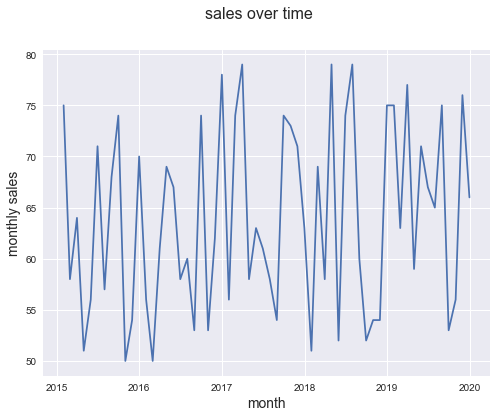

In [303]:
# generated no trend

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
years = pd.date_range('2015-01', periods=60, freq="M")
index = pd.DatetimeIndex(years)

sales= np.random.randint(50, high=80, size=60)

data = pd.Series(sales, index=index)
data.head()

fig = plt.figure(figsize=(8,6))
fig.suptitle('sales over time', fontsize=16)
plt.plot(data)
plt.xlabel("month", fontsize=14)
plt.ylabel("monthly sales", fontsize=14)
plt.show()